Notebook for training and assessing model

- various samples for Liner Regression and SVC
- confusion matrix
- Network graphs

In [56]:
import axelrod as axl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from MachineLearning import *
import plotly
import plotly.plotly as py
from plotly.graph_objs import *

In [47]:
axelrod_strategies = axl.strategies
training_df = pd.read_csv('large_training_data.csv', index_col=0)
compute_sample_scores(3, 3, training_df, axelrod_strategies)

[[0.53333903273082561, 0.93595017098192479],
 [0.32773330891107244, 0.55690203620600176],
 [0.79935026868588177, 0.96926722032242307]]

In [ ]:
# this takes a long time
# sample_scores = [compute_sample_scores(i, 50, training_df, axelrod_strategies) for i in tqdm.trange(50)]

In [49]:
zipped_scores = [list(zip(*k)) for k in sample_scores[2:]]
LR_sample_scores = [[0], [0]] + [i[0] for i in zipped_scores]
SVC_sample_scores = [[0], [0]] + [i[1] for i in zipped_scores]

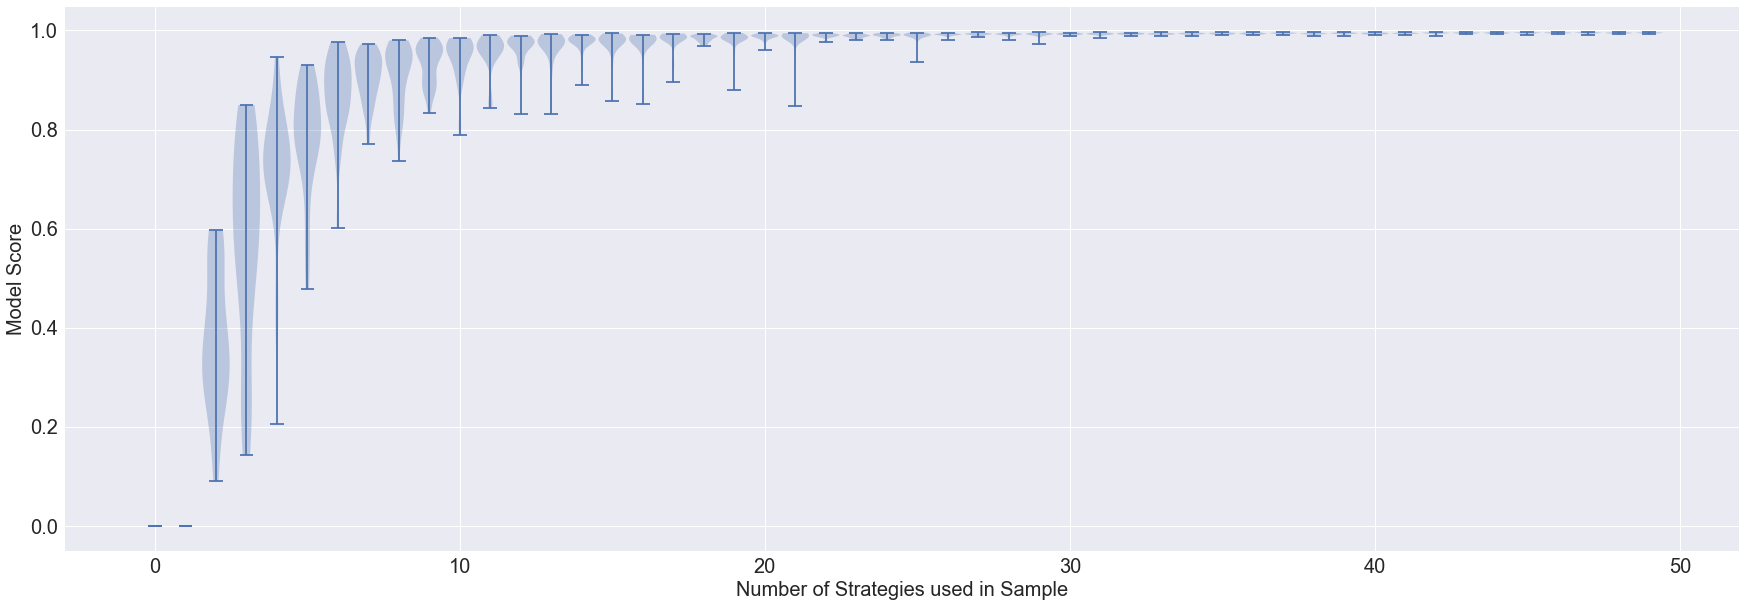

In [58]:
plt.figure(figsize=(30, 10))
lr_ps = [i for i in range(50)]
sns.set_style("darkgrid", {'axes.grid' : True})
lr_plt = plt.violinplot(LR_sample_scores, positions=lr_ps, widths=0.9)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.title('Violin Plot of Model Score against Number of Strategies used in Sample, using Logistic Regression', fontsize=20)
plt.xlabel('Number of Strategies used in Sample', fontsize=20)
plt.ylabel('Model Score', fontsize=20)
plt.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/ML/score_against_sample_size_LR.png', bbox_inches="tight")
plt.show()
plt.clf()

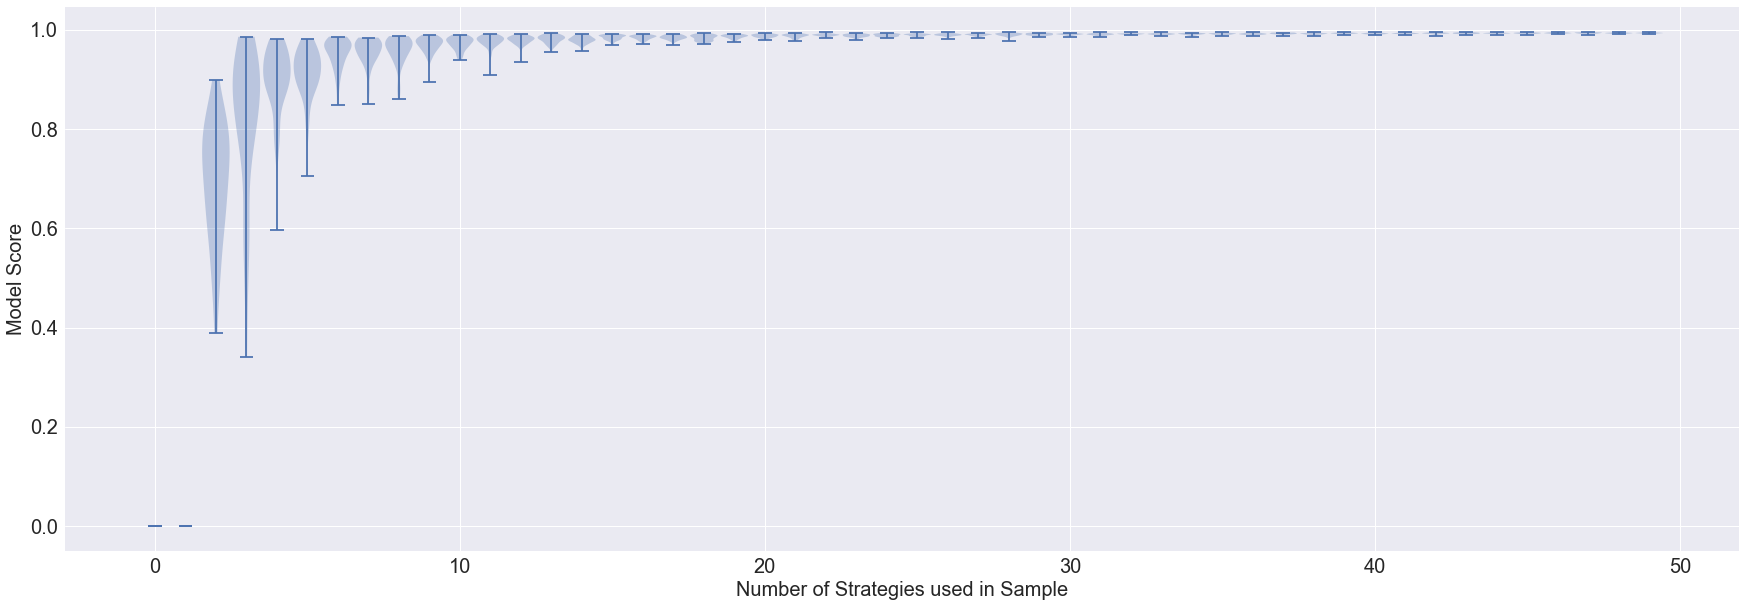

In [59]:
plt.figure(figsize=(30, 10))
svc_ps = [i for i in range(50)]
sns.set_style("darkgrid", {'axes.grid' : True})
svc_plt = plt.violinplot(SVC_sample_scores, positions=svc_ps, widths=0.9)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.title('Violin Plot of Model Score against Number of Strategies used in Sample, using Support Vector Classification', fontsize=20)
plt.xlabel('Number of Strategies used in Sample', fontsize=20)
plt.ylabel('Model Score', fontsize=20)
plt.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/ML/score_against_sample_size_SVC.png', bbox_inches="tight")
plt.show()
plt.clf()

In [3]:
# create dataframe with no dubplicates, only one row for each strategy pair combination
unique_scoring_df = training_df.groupby(['Name_A', 'Name_B']).first()
unique_scoring_df.head(10)

Equivalent  CC_rate_r  CD_rate_r  DC_rate_r  \
Name_A Name_B                                                                   
$\phi$ $\phi$                              1   1.000000   1.000000   1.000000   
       $\pi$                               0   0.753152   0.927595   0.801667   
       $e$                                 0   0.737492   0.905734   0.672500   
       ALLCorALLD                          0   0.739751   0.592238   0.937000   
       Adaptive                            0   0.857269   0.134866   0.541761   
       Adaptive Pavlov 2006                0   0.670804   0.215091   0.836667   
       Adaptive Pavlov 2011                0   0.678422   0.224198   0.883333   
       Adaptive Tit For Tat: 0.5           0   0.594241   0.315265   0.596667   
       Aggravater                          0   0.176211   0.000867   0.521286   
       Alternator                          0   0.908000   0.542064   0.955414   

                                  DD_rate_r  CC_to_C_r  CD_to_C_r  DC_to_C_r  \
Name_A Name_B                                                                  
$\phi$ $\phi$                      1.000000   1.000000   1.000000   1.000000   
       $\pi$                       0.125348   0.701207   1.000000   0.353706   
       $e$                         0.300836   0.721454   1.000000   0.409661   
       ALLCorALLD                  0.367979   0.545858   1.000000   0.000000   
       Adaptive                    0.239174   0.591589   0.878181   0.000000   
       Adaptive Pavlov 2006        0.198562   0.554627   0.530442   0.826317   
       Adaptive Pavlov 2011        0.205143   0.560910   0.450325   0.938279   
       Adaptive Tit For Tat: 0.5   0.217972   0.545858   0.000000   0.343435   
       Aggravater                  0.143830   0.545858   0.000000   0.333433   
       Alternator                  0.288585   0.000000   0.000000   0.343435   

                                  DD_to_C_r  Cooperation_rating_r  \
Name_A Name_B                                                       
$\phi$ $\phi$                      1.000000              1.000000   
       $\pi$                       1.000000              0.861758   
       $e$                         1.000000              0.842350   
       ALLCorALLD                  0.000000              0.842778   
       Adaptive                    0.275000              0.373147   
       Adaptive Pavlov 2006        0.082975              0.635862   
       Adaptive Pavlov 2011        0.020550              0.636443   
       Adaptive Tit For Tat: 0.5   0.000000              0.766347   
       Aggravater                  0.000000              0.058704   
       Alternator                  1.000000              0.726533   

                                  Initial_C_rate_r  Median_score_r    Wins_r  
Name_A Name_B                                                                 
$\phi$ $\phi$                                 1.00        1.000000  1.000000  
       $\pi$                                  1.00        0.960262  1.000000  
       $e$                                    1.00        0.897173  0.750000  
       ALLCorALLD                             0.58        0.846945  0.800000  
       Adaptive                               1.00        0.630139  0.421053  
       Adaptive Pavlov 2006                   1.00        0.820228  0.533333  
       Adaptive Pavlov 2011                   1.00        0.809015  0.615385  
       Adaptive Tit For Tat: 0.5              1.00        0.891120  0.000000  
       Aggravater                             0.00        0.668492  0.380952  
       Alternator                             1.00        0.866064  0.615385

In [4]:
# create models using specified strategies to see how the confusion matrices compare
results_df = pd.read_csv('std_summary.csv')
ordered_strats = results_df.Name.values
model_strats = ordered_strats[::5] # every 5th strategy when order by rank from round robin tournament
model_train_df, model_score_df = split_dataframe(model_strats, training_df)
lr_model, svc_model = create_models_for_sample(model_train_df)

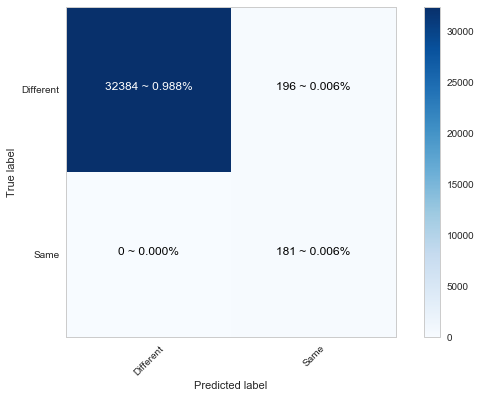

0.99401727664


In [64]:
scoring_equivalent = unique_scoring_df['Equivalent']
scoring_data = unique_scoring_df.copy()
scoring_data.drop('Equivalent', axis=1, inplace=True)
svc_predictions = svc_model.predict(scoring_data)
svc_c_matrix = confusion_matrix(scoring_equivalent, svc_predictions)
np.set_printoptions(precision=2)
class_names = ['Different', 'Same']
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure()
plot_confusion_matrix(svc_c_matrix, classes=class_names, title='')
plt.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/ML/confusion_matrix.png', bbox_inches='tight')
plt.show()
plt.clf()
print(svc_model.score(X=scoring_data, y=scoring_equivalent))

In [83]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(X=scoring_data, y=scoring_equivalent)
p_vals = list(zip(scoring_data.columns, pvalues))
pval_df = pd.DataFrame(data=p_vals, columns=['Variable', 'p Value'])
p = pval_df.to_latex(index=False)
with open("/Users/James/Projects/FinalYearReport-Manuscript/img/p-values.tex", "w") as text_file:
    text_file.write(p)

In [13]:
# collect rows where the model thinks the strategies are the same
actual_model_predictions = svc_predictions
equivalent_df = unique_scoring_df.copy().reset_index()
equivalent_df['Predictions'] = actual_model_predictions
equivalent_df = equivalent_df[equivalent_df['Predictions'] == 1]
equivalent_names = equivalent_df[['Name_A', 'Name_B']]
equivalent_names.head()

Name_A  Name_B
0    $\phi$  $\phi$
182   $\pi$   $\pi$
183   $\pi$     $e$
363     $e$   $\pi$
364     $e$     $e$

In [15]:
# create adjacency matrix for strategies that are equivalent
adj_df = pd.crosstab(equivalent_names.Name_A, equivalent_names.Name_B)
idx = adj_df.columns.union(adj_df.index)
adj_df = adj_df.reindex(index = idx, columns=idx, fill_value=0)
adj_df.head()

$\phi$  $\pi$  $e$  ALLCorALLD  Adaptive  Adaptive Pavlov 2006  \
$\phi$           1      0    0           0         0                     0   
$\pi$            0      1    1           0         0                     0   
$e$              0      1    1           0         0                     0   
ALLCorALLD       0      0    0           1         0                     0   
Adaptive         0      0    0           0         1                     0   

            Adaptive Pavlov 2011  Adaptive Tit For Tat: 0.5  Aggravater  \
$\phi$                         0                          0           0   
$\pi$                          0                          0           0   
$e$                            0                          0           0   
ALLCorALLD                     0                          0           0   
Adaptive                       0                          0           0   

            Alternator    ...     Winner21  Worse and Worse  \
$\phi$               0    ...            0                0   
$\pi$                0    ...            0                0   
$e$                  0    ...            0                0   
ALLCorALLD           0    ...            0                0   
Adaptive             0    ...            0                0   

            Worse and Worse 2  Worse and Worse 3  ZD-Extort-2  ZD-Extort-2 v2  \
$\phi$                      0                  0            0               0   
$\pi$                       0                  0            0               0   
$e$                         0                  0            0               0   
ALLCorALLD                  0                  0            0               0   
Adaptive                    0                  0            0               0   

            ZD-Extort-4  ZD-GEN-2  ZD-GTFT-2  ZD-SET-2  
$\phi$                0         0          0         0  
$\pi$                 0         0          0         0  
$e$                   0         0          0         0  
ALLCorALLD            0         0          0         0  
Adaptive              0         0          0         0  

[5 rows x 181 columns]

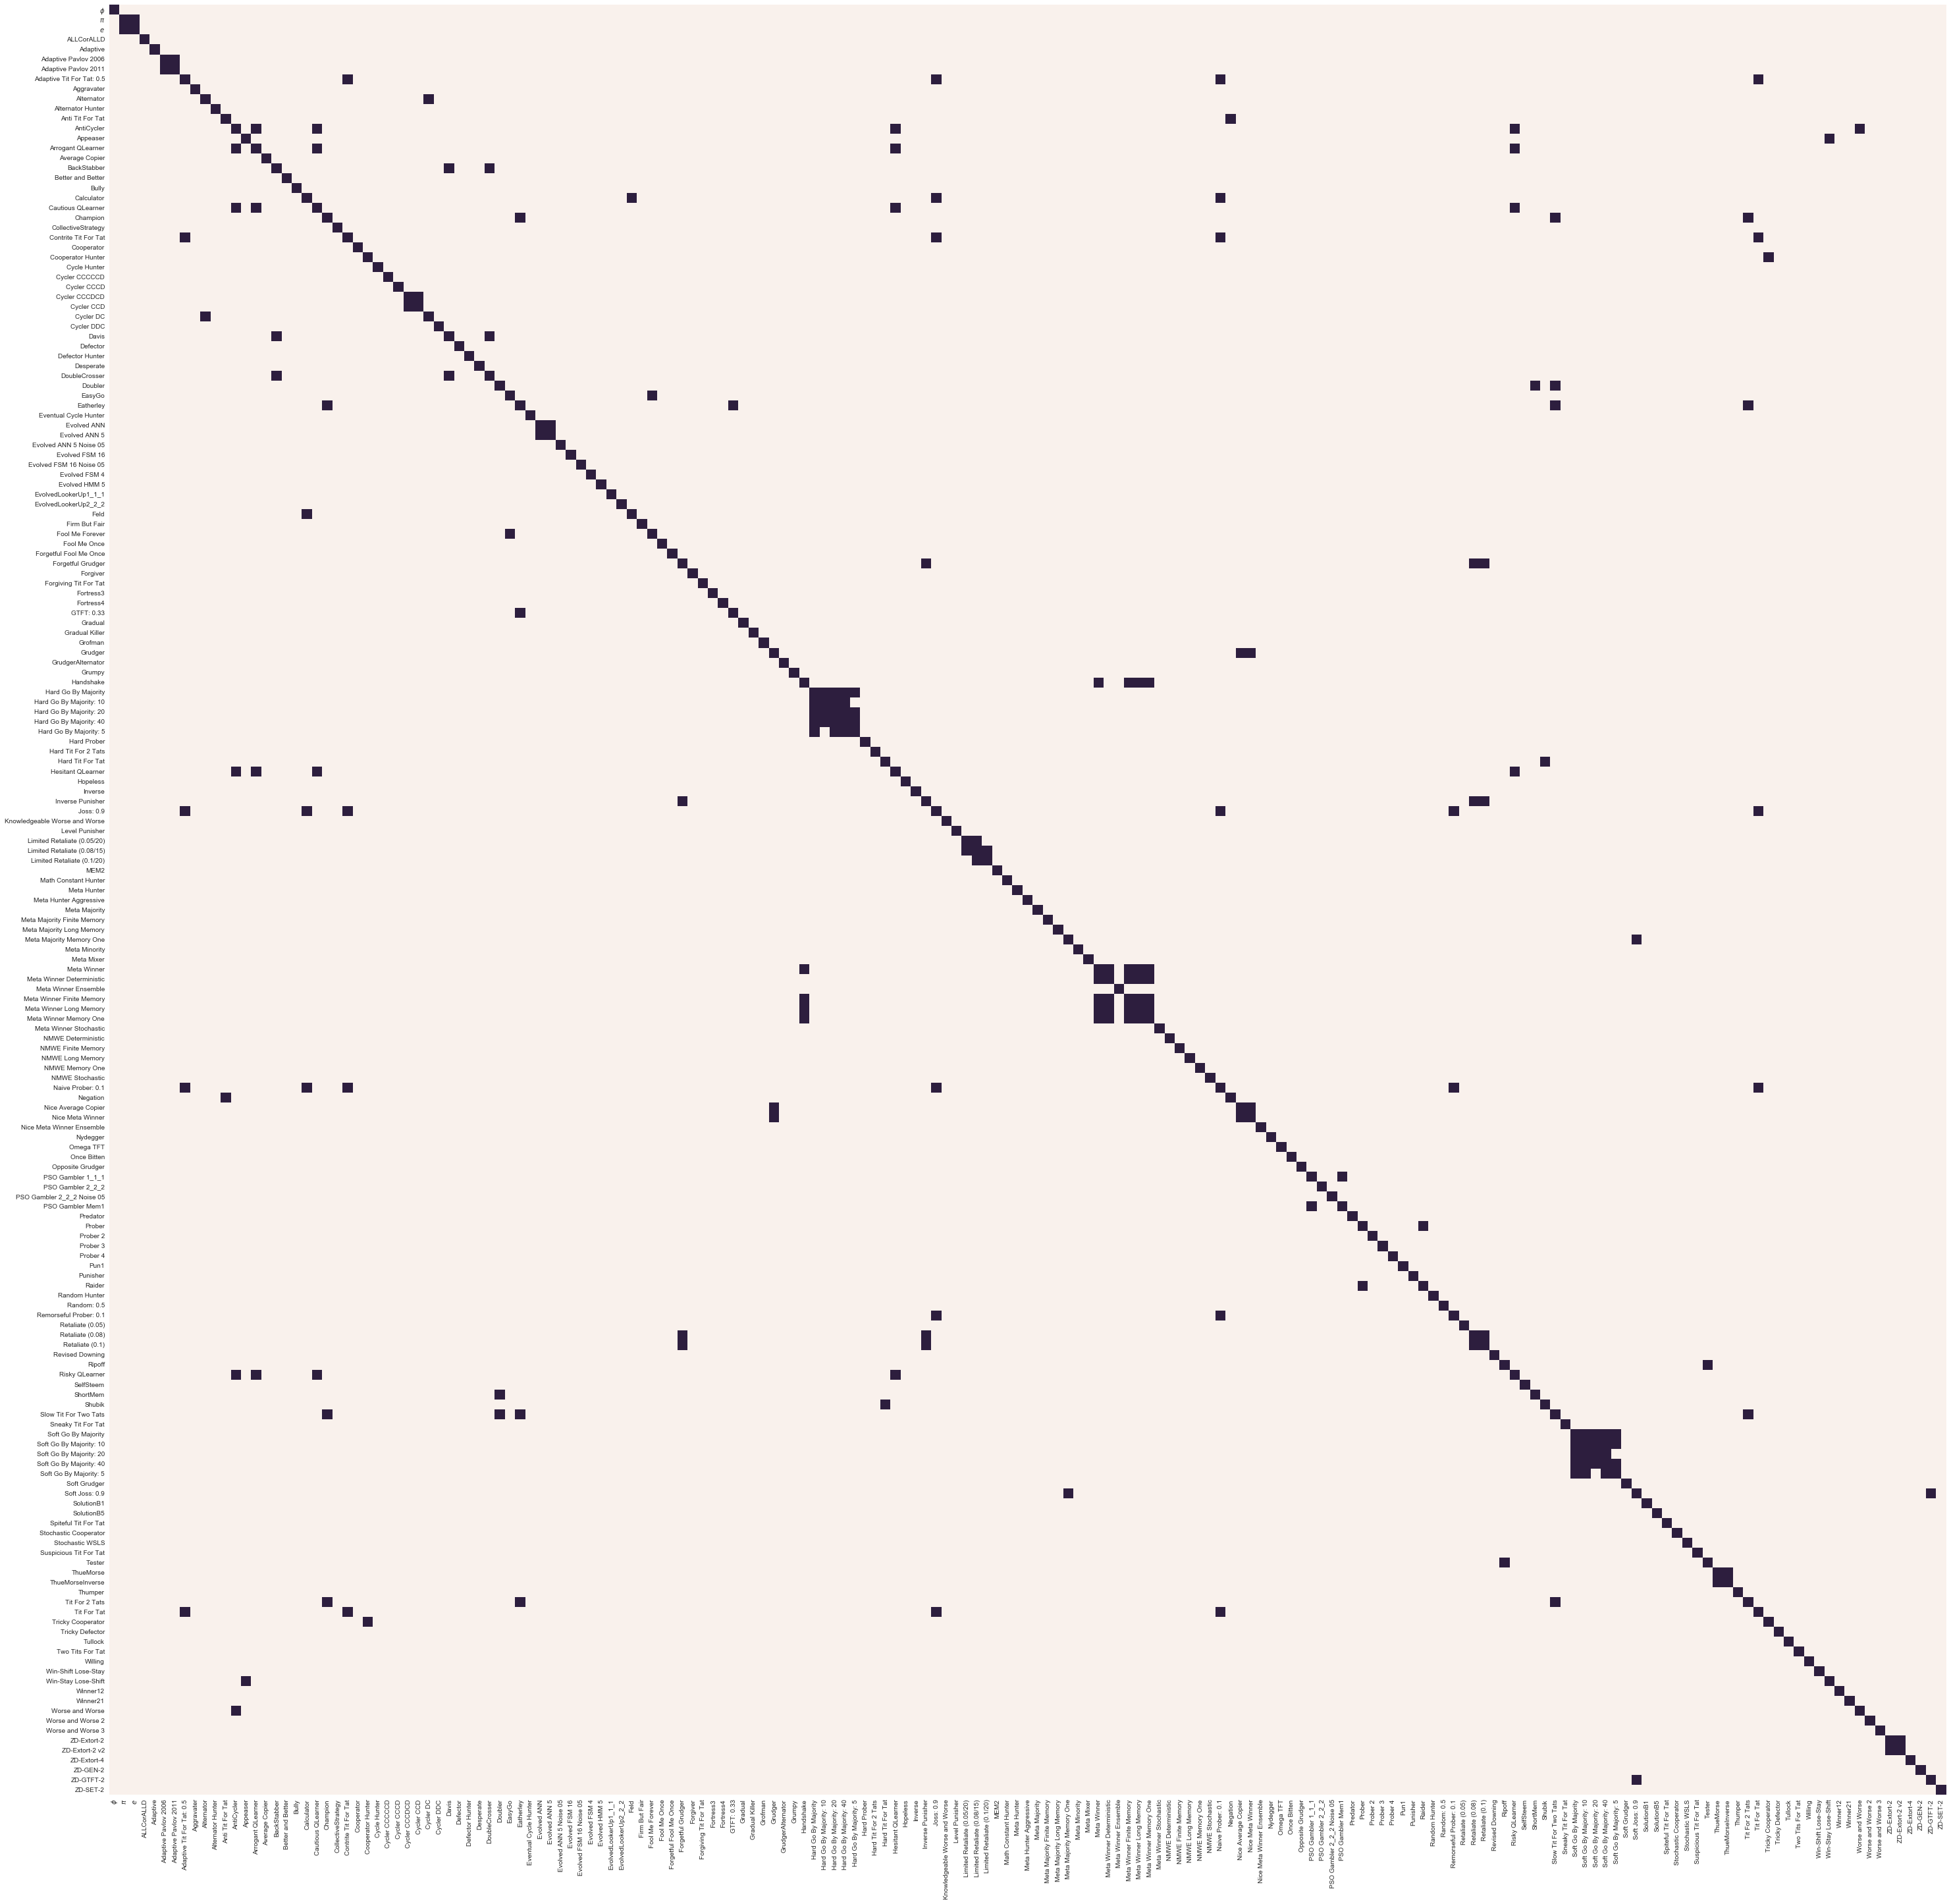

In [66]:
plt.figure(figsize=(50, 50))
sns.heatmap(adj_df, cbar=False)
plt.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/ML/similarity_heatmap.png', bbox_inches='tight')
plt.show()

In [52]:
G=nx.from_pandas_dataframe(equivalent_names, 'Name_A', 'Name_B', True)
UG = G.to_undirected()
sub_graphs = nx.connected_component_subgraphs(UG)

In [53]:
plotly.offline.init_notebook_mode()
py.sign_in('theref', '5zi1ecSf80pI5u7I5rP0')

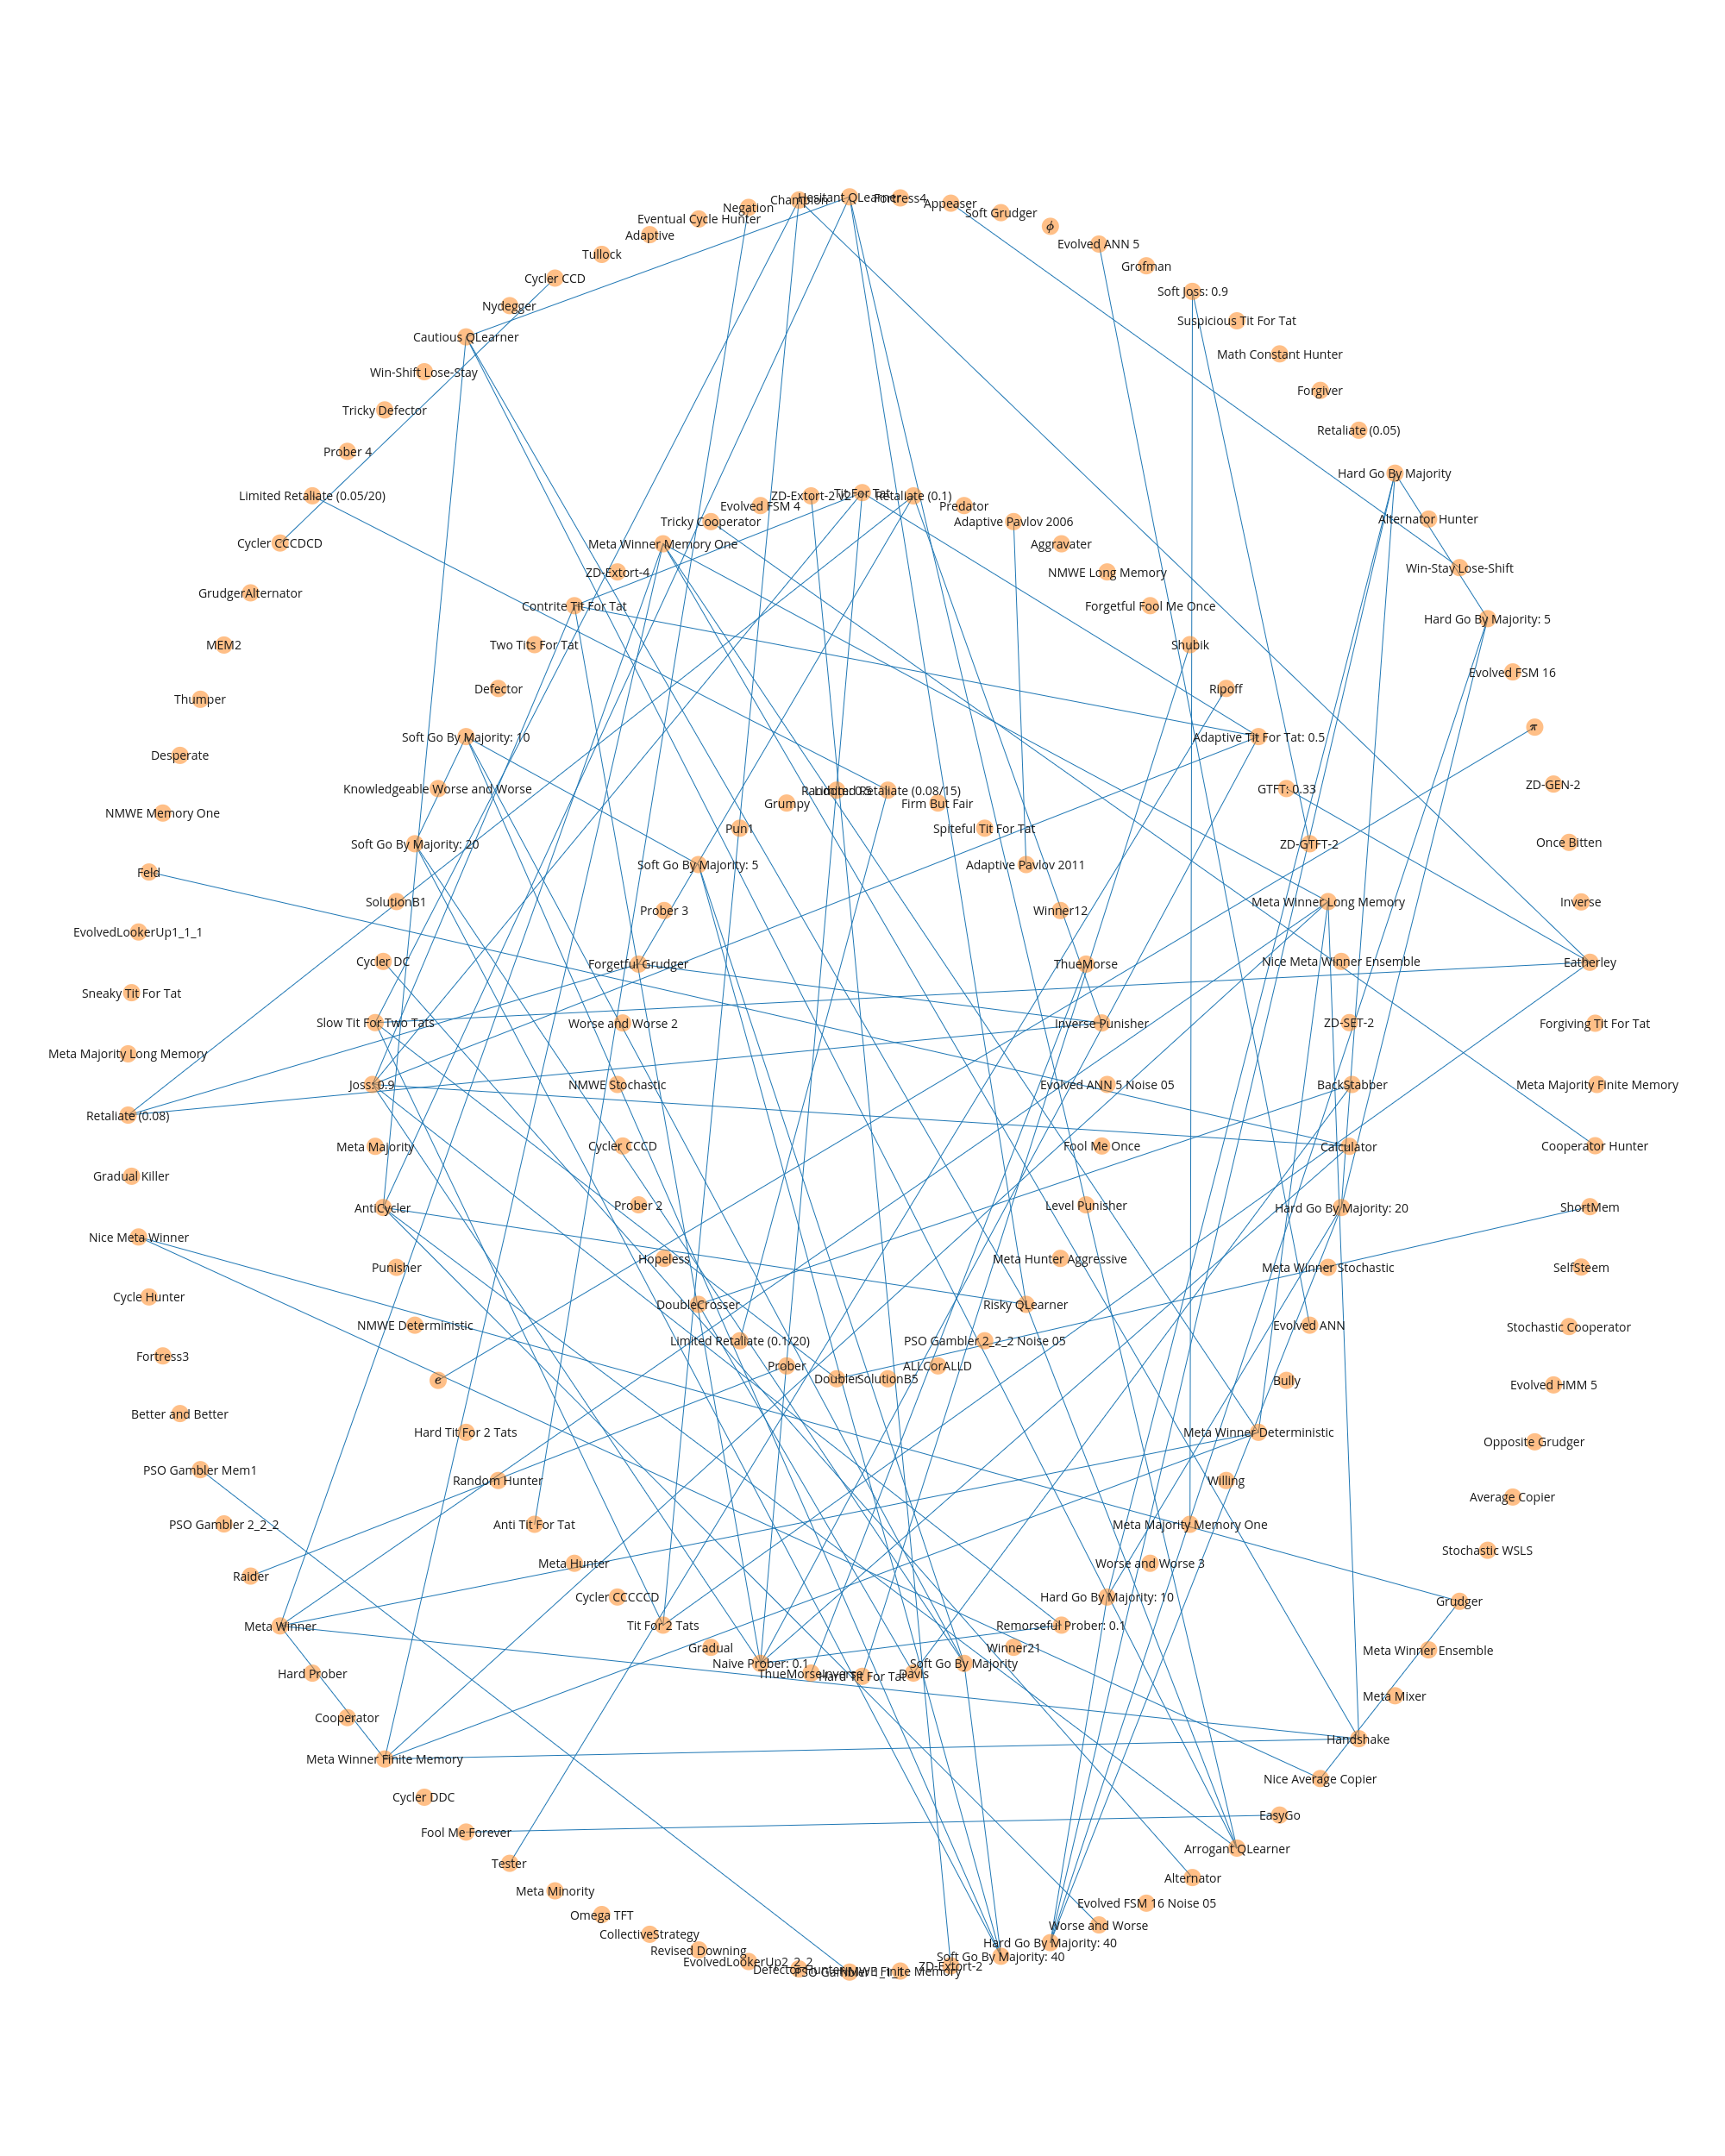

In [54]:
def scatter_nodes(pos, labels=None, color=None, size=20, opacity=0.5):
    # pos is the dict of node positions
    # labels is a list  of labels of len(pos), to be displayed when hovering the mouse over the nodes
    # color is the color for nodes. When it is set as None the Plotly default color is used
    # size is the size of the dots representing the nodes
    #opacity is a value between [0,1] defining the node color opacity
    trace = Scatter(x=[], y=[],  mode='markers', marker=Marker(size=[]))
    for k, v in pos.items():
        trace['x'].append(pos[k][0])
        trace['y'].append(pos[k][1])
    attrib=dict(name='', text=labels , hoverinfo='text', opacity=opacity) # a dict of Plotly node attributes
    trace=dict(trace, **attrib)# concatenate the dict trace and attrib
    trace['marker']['size']=size
    return trace 


def scatter_edges(G, pos, line_color=None, line_width=1):
    trace = Scatter(x=[], y=[], mode='lines')
    for edge in G.edges():
        trace['x'] += [pos[edge[0]][0],pos[edge[1]][0], None]
        trace['y'] += [pos[edge[0]][1],pos[edge[1]][1], None]  
        trace['hoverinfo']='none'
        trace['line']['width']=line_width
        if line_color is not None: # when it is None a default Plotly color is used
            trace['line']['color']=line_color
    return trace

def make_annotations(pos, font_size=14, font_color='rgb(25,25,25)'):
    annotations = Annotations()
    for k, v in pos.items():
        annotations.append(
            Annotation(
                text=str(k), 
                x=pos[k][0], y=pos[k][1],
                xref='x1', yref='y1',
                font=dict(color= font_color, size=font_size),
                showarrow=False)
        )
    return annotations 

G=nx.from_pandas_dataframe(equivalent_names, 'Name_A', 'Name_B', True)
sixth = len(G.nodes())//6
inner, middle, outer = G.nodes()[:sixth], G.nodes()[sixth:3*sixth], G.nodes()[3*sixth:]
pos=nx.shell_layout(G, nlist=[inner, middle, outer], scale=10)

labels=[str(k) for k in range(len(pos))] # labels are  set as being the nodes indices in the list of nodes
trace1=scatter_edges(G, pos)
trace2=scatter_nodes(pos, labels=labels)

width=2000
height=2500
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )
layout=Layout(
    font= Font(),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
        pad=0,
       
    ),
    hovermode='closest',
#     plot_bgcolor='#EFECEA', #set background color            
    )


data=Data([trace1, trace2])

fig = Figure(data=data, layout=layout)
fig['layout'].update(annotations=make_annotations(pos))

py.image.ishow(fig)
# py.image.save_as(fig, filename='/Users/James/Projects/FinalYearReport-Manuscript/img/neighbourhoods/overall.png')

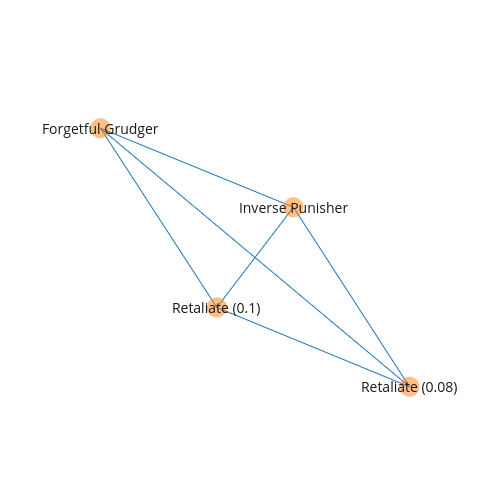

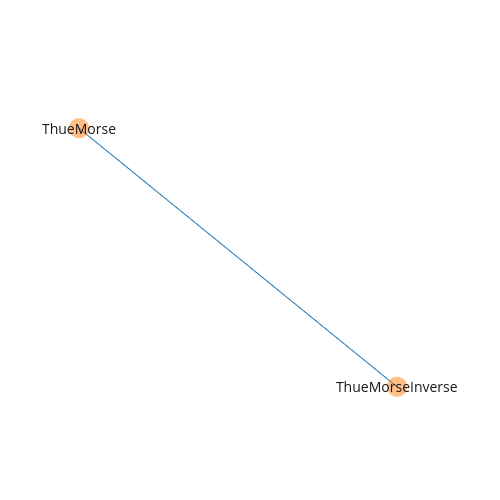

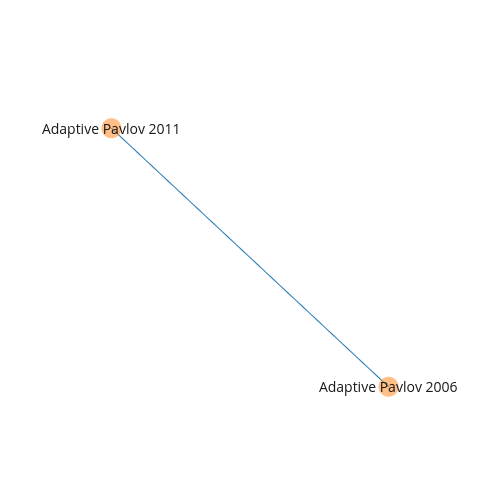

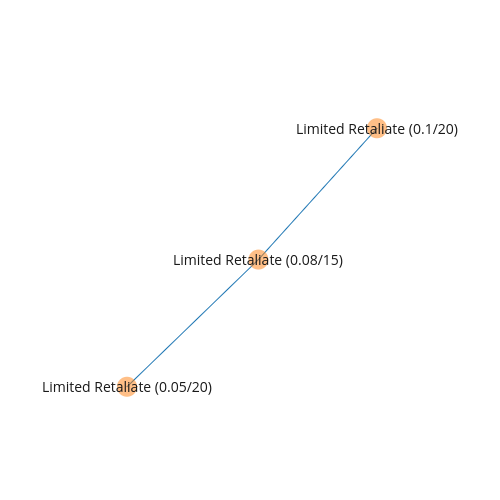

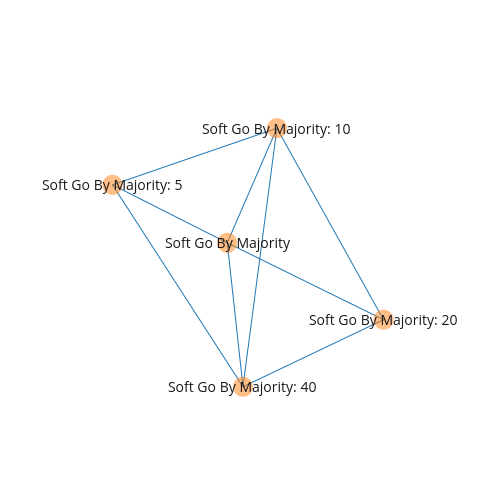

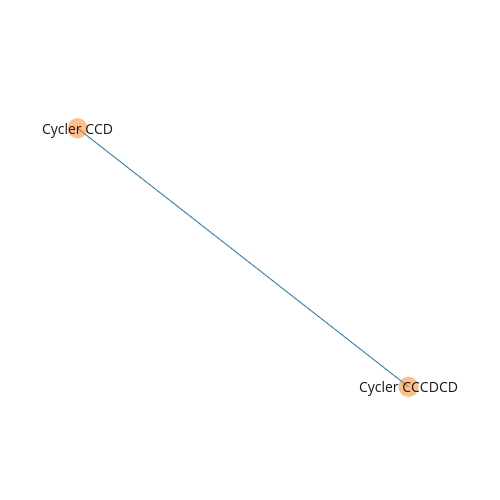

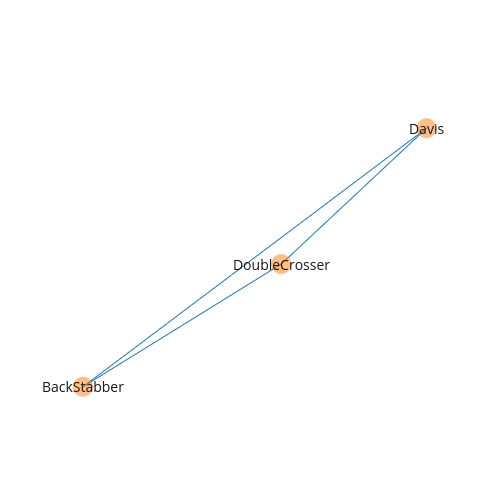

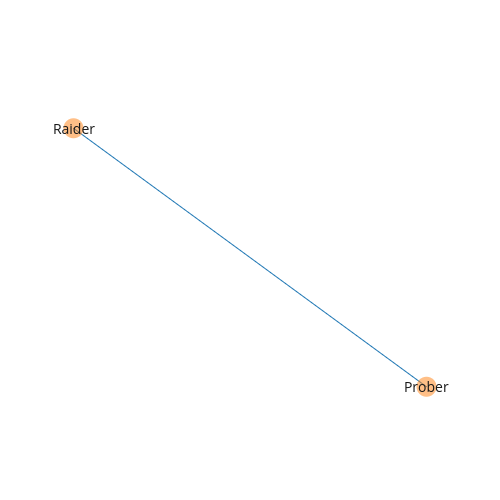

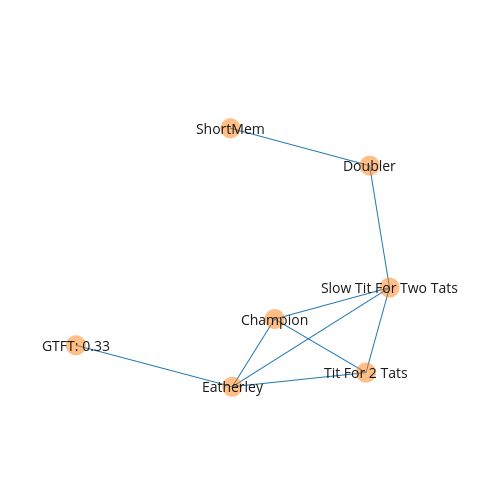

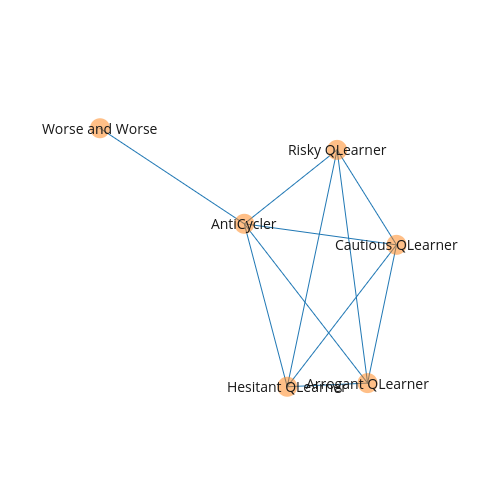

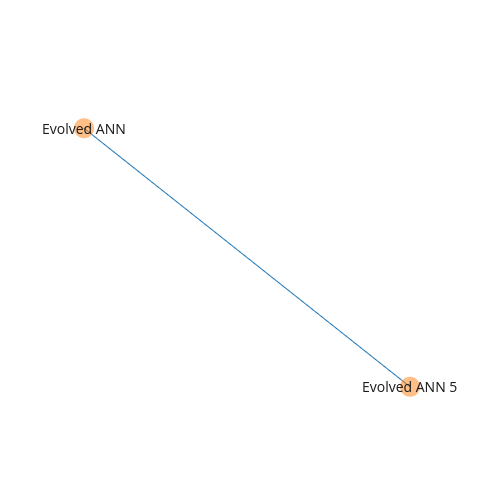

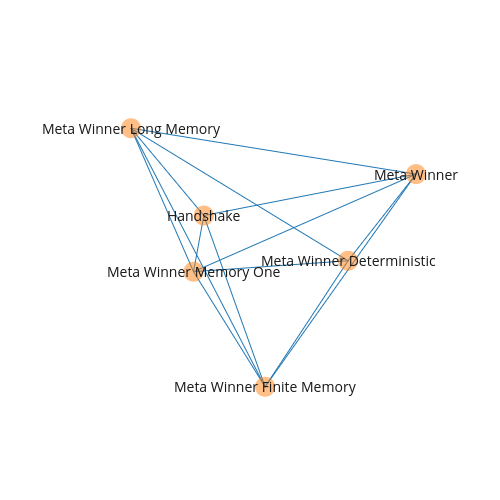

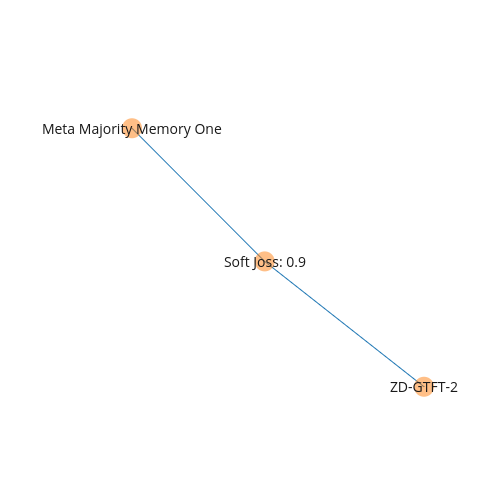

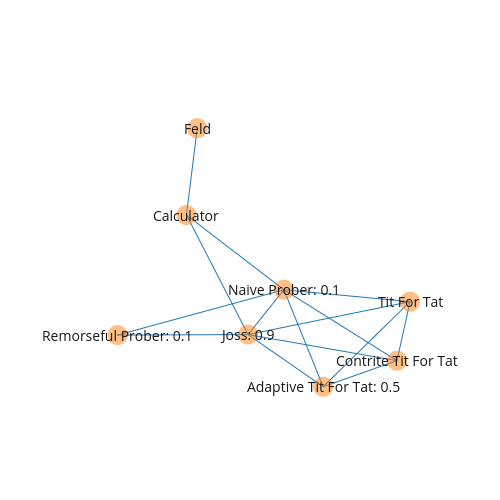

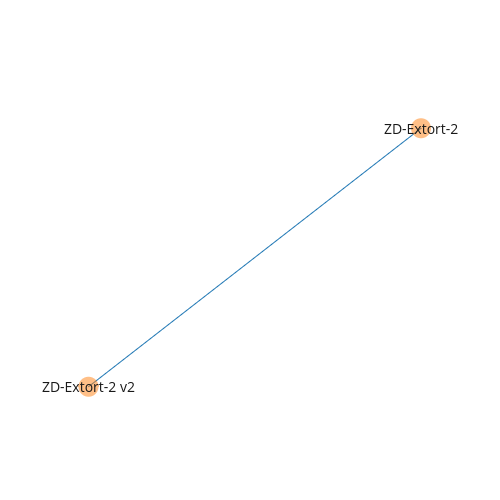

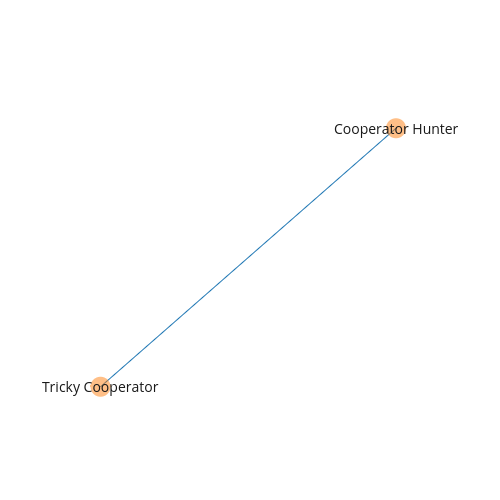

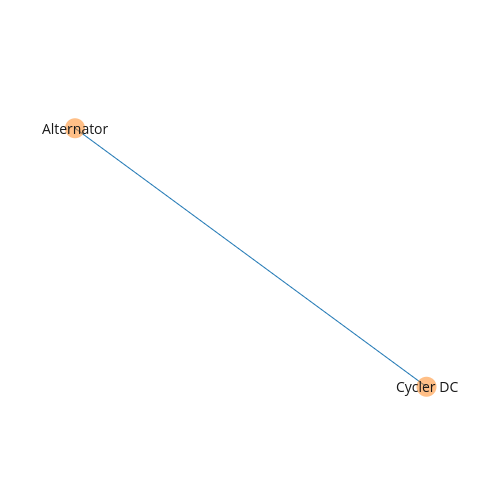

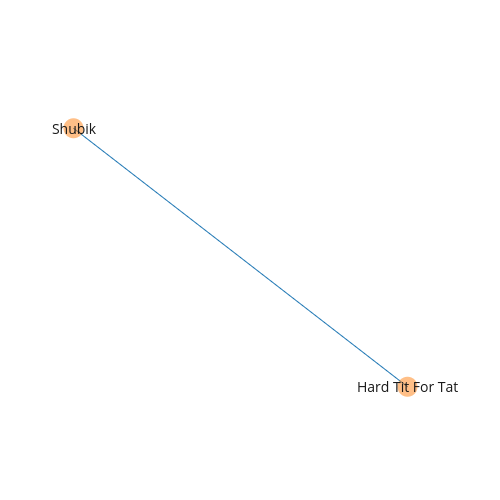

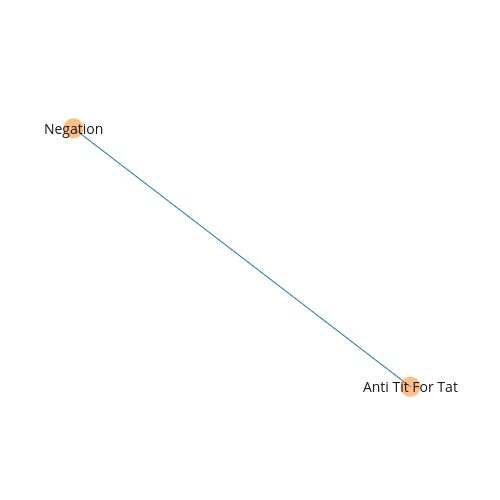

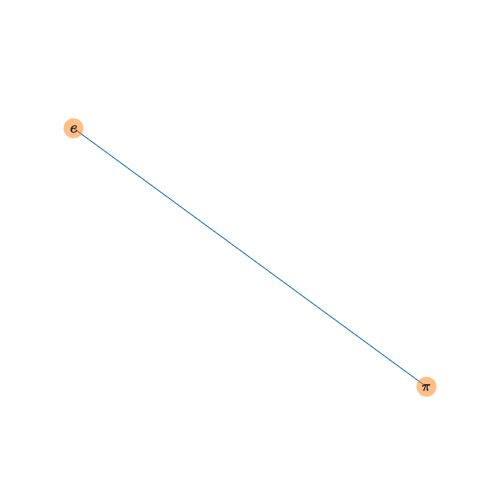

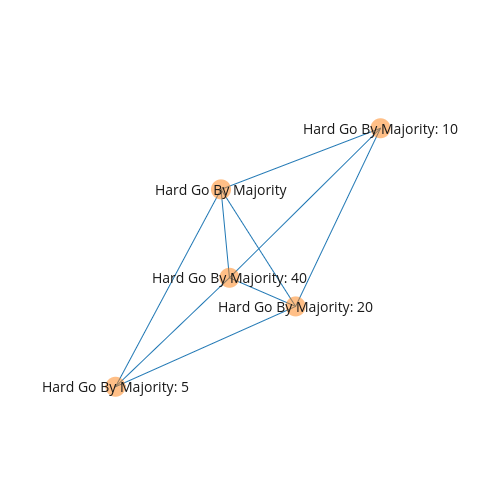

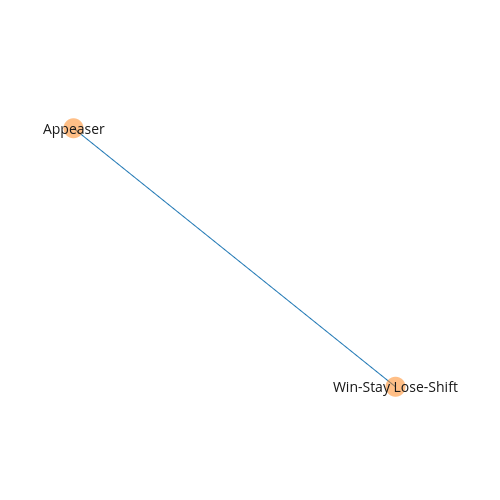

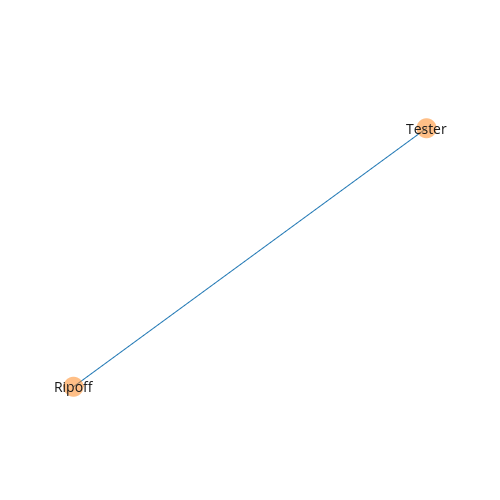

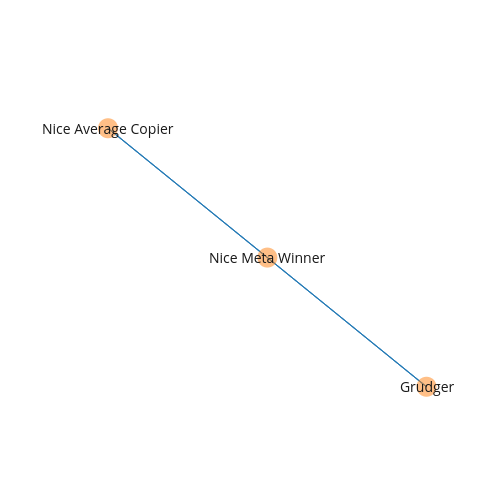

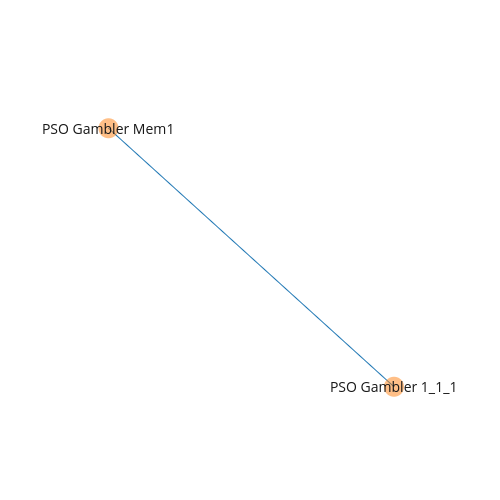

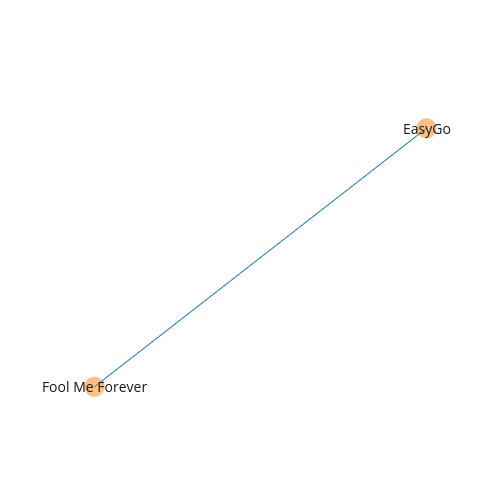

In [55]:
UG = G.to_undirected()
sub_graphs = nx.connected_component_subgraphs(UG)

for index, sg in enumerate(sub_graphs):
    if nx.number_of_nodes(sg) < 2:
        continue # ignore this graph and move onto the next one
    pos=nx.spring_layout(sg)
    labels=[str(k) for k in range(len(pos))] # labels are  set as being the nodes indices in the list of nodes
    trace1=scatter_edges(sg, pos)
    trace2=scatter_nodes(pos, labels=labels)
    width=500
    height=500
    data=Data([trace1, trace2])
    layout=Layout(
        font= Font(),
        showlegend=False,
        autosize=False,
        width=width,
        height=height,
        xaxis=XAxis(axis),
        yaxis=YAxis(axis),
        margin=Margin(
            l=40,
            r=40,
            b=85,
            t=100,
            pad=0,

        ),
    hovermode='closest',
#     plot_bgcolor='#EFECEA', #set background color            
    )
    fig = Figure(data=data, layout=layout)
    fig['layout'].update(annotations=make_annotations(pos))

    py.image.ishow(fig)
    py.image.save_as(fig, filename='/Users/James/Projects/FinalYearReport-Manuscript/img/neighbourhoods/{}.png'.format(index))